# Dogs & Cats com VIT

Este notebook implementa um classificador de Cães e Gatos usando um modelo pré-treinado do tipo transformer de visão (ViT) da biblioteca Hugging Face Transformers.

---
**Aluno:** Adalberto Ferreira Barbosa Junior<br>
**Matrícula:** 201905439

In [1]:
# Install required packages
!pip install transformers datasets evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
t

In [7]:
!wget https://github.com/scadriano/lia1_2025_1/raw/refs/heads/main/Modelo%20para%20Identificar%20Cats%20or%20Dogs/dataset_treino.zip

--2025-04-09 12:15:19--  https://github.com/scadriano/lia1_2025_1/raw/refs/heads/main/Modelo%20para%20Identificar%20Cats%20or%20Dogs/dataset_treino.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/scadriano/lia1_2025_1/refs/heads/main/Modelo%20para%20Identificar%20Cats%20or%20Dogs/dataset_treino.zip [following]
--2025-04-09 12:15:19--  https://raw.githubusercontent.com/scadriano/lia1_2025_1/refs/heads/main/Modelo%20para%20Identificar%20Cats%20or%20Dogs/dataset_treino.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22990940 (22M) [application/zip]
Saving to: ‘dataset_treino.zip’

dataset_t

In [13]:
!wget https://github.com/scadriano/lia1_2025_1/raw/refs/heads/main/Modelo%20para%20Identificar%20Cats%20or%20Dogs/dataset_teste.zip

--2025-04-09 12:22:16--  https://github.com/scadriano/lia1_2025_1/raw/refs/heads/main/Modelo%20para%20Identificar%20Cats%20or%20Dogs/dataset_teste.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/scadriano/lia1_2025_1/refs/heads/main/Modelo%20para%20Identificar%20Cats%20or%20Dogs/dataset_teste.zip [following]
--2025-04-09 12:22:17--  https://raw.githubusercontent.com/scadriano/lia1_2025_1/refs/heads/main/Modelo%20para%20Identificar%20Cats%20or%20Dogs/dataset_teste.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4536691 (4.3M) [application/zip]
Saving to: ‘dataset_teste.zip’

dataset_teste

In [8]:
!unzip dataset_treino.zip

Archive:  dataset_treino.zip
  inflating: dataset_treino/dogs/dog.99.jpg  
  inflating: dataset_treino/dogs/dog.98.jpg  
  inflating: dataset_treino/dogs/dog.96.jpg  
  inflating: dataset_treino/dogs/dog.97.jpg  
  inflating: dataset_treino/cats/cat.99.jpg  
  inflating: dataset_treino/cats/cat.98.jpg  
  inflating: dataset_treino/cats/cat.97.jpg  
  inflating: dataset_treino/dogs/dog.95.jpg  
  inflating: dataset_treino/cats/cat.96.jpg  
  inflating: dataset_treino/dogs/dog.94.jpg  
  inflating: dataset_treino/cats/cat.95.jpg  
  inflating: dataset_treino/cats/cat.94.jpg  
  inflating: dataset_treino/dogs/dog.93.jpg  
  inflating: dataset_treino/cats/cat.93.jpg  
  inflating: dataset_treino/dogs/dog.91.jpg  
  inflating: dataset_treino/dogs/dog.92.jpg  
  inflating: dataset_treino/cats/cat.91.jpg  
  inflating: dataset_treino/cats/cat.92.jpg  
  inflating: dataset_treino/dogs/dog.90.jpg  
  inflating: dataset_treino/cats/cat.9.jpg  
  inflating: dataset_treino/cats/cat.90.jpg  
  infl

In [14]:
!unzip dataset_teste.zip

Archive:  dataset_teste.zip
  inflating: dataset_teste/135.jpg   
  inflating: dataset_teste/186.jpg   
  inflating: dataset_teste/190.jpg   
  inflating: dataset_teste/195.jpg   
  inflating: dataset_teste/120.jpg   
  inflating: dataset_teste/191.jpg   
  inflating: dataset_teste/193.jpg   
  inflating: dataset_teste/200.jpg   
  inflating: dataset_teste/192.jpg   
  inflating: dataset_teste/199.jpg   
  inflating: dataset_teste/194.jpg   
  inflating: dataset_teste/189.jpg   
  inflating: dataset_teste/198.jpg   
  inflating: dataset_teste/182.jpg   
  inflating: dataset_teste/180.jpg   
  inflating: dataset_teste/188.jpg   
  inflating: dataset_teste/196.jpg   
  inflating: dataset_teste/183.jpg   
  inflating: dataset_teste/184.jpg   
  inflating: dataset_teste/197.jpg   
  inflating: dataset_teste/145.jpg   
  inflating: dataset_teste/176.jpg   
  inflating: dataset_teste/187.jpg   
  inflating: dataset_teste/181.jpg   
  inflating: dataset_teste/155.jpg   
  inflating: dataset_t

In [2]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision.datasets import ImageFolder
from transformers import ViTForImageClassification, ViTImageProcessor
from PIL import Image
import os
from tqdm import tqdm
import numpy as np

In [3]:
# Set device and random seed for reproducibility
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(42)
print(f'Using device: {device}')

Using device: cuda


In [4]:
# Initialize ViT model and processor
model_name = "google/vit-base-patch16-224"
processor = ViTImageProcessor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(
    model_name,
    num_labels=2,
    ignore_mismatched_sizes=True
)
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
class DogsAndCatsDataset(Dataset):
    def __init__(self, root_dir, processor):
        self.dataset = ImageFolder(root_dir)
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, label = self.dataset[idx]
        # Process image using ViT processor
        inputs = self.processor(images=image, return_tensors="pt")
        pixel_values = inputs['pixel_values'].squeeze()
        return pixel_values, label

In [9]:
# Data path - assuming all data is in the train directory
train_dir = './dataset_treino'

# Create full dataset
full_dataset = DogsAndCatsDataset(train_dir, processor)

# Calculate lengths for splits (80% train, 20% validation)
total_size = len(full_dataset)
train_size = int(0.8 * total_size)
val_size = total_size - train_size

# Create train and validation splits
train_dataset, val_dataset = random_split(
    full_dataset,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(42)
)

print(f'Total dataset size: {total_size}')
print(f'Training set size: {len(train_dataset)}')
print(f'Validation set size: {len(val_dataset)}')

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

Total dataset size: 1002
Training set size: 801
Validation set size: 201


In [10]:
# Training settings
num_epochs = 10
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}')
    for batch_idx, (images, labels) in enumerate(progress_bar):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(pixel_values=images, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Calculate accuracy
        _, predicted = outputs.logits.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        progress_bar.set_postfix(
            loss=total_loss/(batch_idx+1),
            accuracy=100.*correct/total
        )

    # Validation
    model.eval()
    val_correct = 0
    val_total = 0
    val_loss = 0

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation'):
            images, labels = images.to(device), labels.to(device)
            outputs = model(pixel_values=images, labels=labels)
            val_loss += outputs.loss.item()
            _, predicted = outputs.logits.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    print(f'Epoch {epoch + 1}/{num_epochs}:')
    print(f'Training Loss: {total_loss/len(train_loader):.4f}')
    print(f'Training Accuracy: {100.*correct/total:.2f}%')
    print(f'Validation Loss: {val_loss/len(val_loader):.4f}')
    print(f'Validation Accuracy: {100.*val_correct/val_total:.2f}%\n')

Validation: 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]


Epoch 1/10:
Training Loss: 0.1337
Training Accuracy: 95.63%
Validation Loss: 0.0066
Validation Accuracy: 100.00%



Validation: 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]


Epoch 2/10:
Training Loss: 0.0027
Training Accuracy: 100.00%
Validation Loss: 0.0019
Validation Accuracy: 100.00%



Validation: 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]


Epoch 3/10:
Training Loss: 0.0010
Training Accuracy: 100.00%
Validation Loss: 0.0013
Validation Accuracy: 100.00%



Validation: 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]


Epoch 4/10:
Training Loss: 0.0007
Training Accuracy: 100.00%
Validation Loss: 0.0010
Validation Accuracy: 100.00%



Validation: 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]


Epoch 5/10:
Training Loss: 0.0005
Training Accuracy: 100.00%
Validation Loss: 0.0008
Validation Accuracy: 100.00%



Validation: 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]


Epoch 6/10:
Training Loss: 0.0004
Training Accuracy: 100.00%
Validation Loss: 0.0007
Validation Accuracy: 100.00%



Validation: 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]


Epoch 7/10:
Training Loss: 0.0004
Training Accuracy: 100.00%
Validation Loss: 0.0006
Validation Accuracy: 100.00%



Validation: 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]


Epoch 8/10:
Training Loss: 0.0003
Training Accuracy: 100.00%
Validation Loss: 0.0005
Validation Accuracy: 100.00%



Validation: 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]


Epoch 9/10:
Training Loss: 0.0002
Training Accuracy: 100.00%
Validation Loss: 0.0004
Validation Accuracy: 100.00%



Validation: 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]

Epoch 10/10:
Training Loss: 0.0002
Training Accuracy: 100.00%
Validation Loss: 0.0004
Validation Accuracy: 100.00%



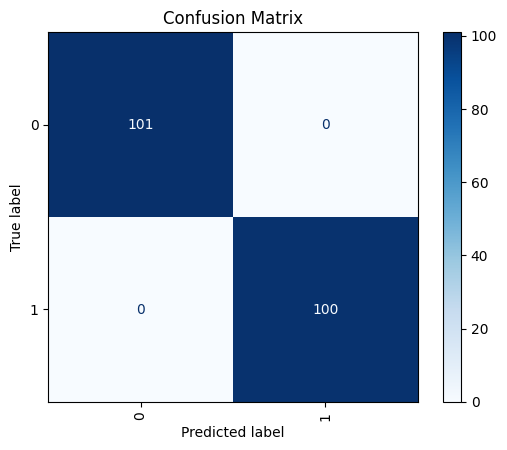

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Coletar todos os rótulos verdadeiros e predições
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in tqdm(val_loader, desc='Collecting predictions for confusion matrix'):
        images, labels = images.to(device), labels.to(device)
        outputs = model(pixel_values=images, labels=labels)
        _, predicted = outputs.logits.max(1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calcular matriz de confusão
cm = confusion_matrix(all_labels, all_preds)

# Opcional: nome das classes
# class_names = ['cat', 'dog', 'car', 'plane']  # Substitua pelos seus rótulos reais

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)  # , display_labels=class_names
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()


In [15]:
from PIL import Image


# Load and preprocess the test image
test_image_path = './dataset_teste/100.jpg'
image = Image.open(test_image_path)

# Process image using the ViT processor
inputs = processor(images=image, return_tensors="pt")
pixel_values = inputs['pixel_values'].to(device)

# Set model to evaluation mode
model.eval()

# Perform inference
with torch.no_grad():
    outputs = model(pixel_values=pixel_values)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    predicted_class = torch.argmax(probabilities, dim=-1).item()

# Get class names (assuming 0 is cat and 1 is dog based on the directory structure)
class_names = ['cat', 'dog']
predicted_label = class_names[predicted_class]
confidence = probabilities[0][predicted_class].item()

# Exibindo a imagem
image.show()

print(f'Predicted class: {predicted_label}')
print(f'Confidence: {confidence:.2%}')


Predicted class: cat
Confidence: 99.97%


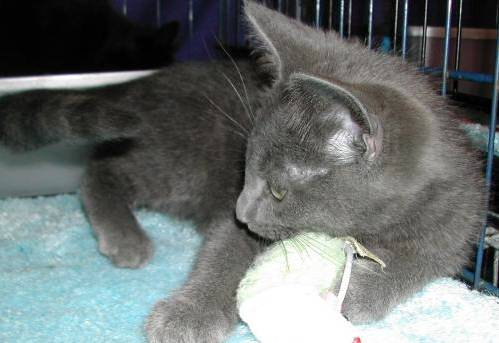

In [17]:
image

In [ ]:

# Now you can save the model
torch.save(model.state_dict(), 'dogs_cats_vit.pth')
print('Model saved successfully!')